In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def f_x(var):
    return np.sin(var)

In [11]:
n = 10000         # Number of samples
a = 0.0           # lower x bound
b = (3/2) * np.pi # upper x bound
c = -1.0           # lower y bound, will have to mod
d = 1.0           # upper y bound, will have to mod

In [12]:
# Define the Monte Carlo Parameters:
def mc_parameters(lower_x, upper_x, lower_y, upper_y):
    # If lower, subtract 0.1
    # If upper, add 0.1
    a_x = lower_x
    b_x = upper_x
    c_y = lower_y
    d_y = upper_y
    return a_x,b_x,c_y,d_y

In [6]:
# Define the Monte Carlo Parameters:
def mc_parameters(lower_x, upper_x, lower_y, upper_y):
    # If lower, subtract 0.1
    # If upper, add 0.1
    a_x = lower_x
    b_x = upper_x
    c_y = lower_y
    d_y = upper_y
    return a_x,b_x,c_y,d_y

In [14]:
# Define the integration method with the mc_parameters

# Call mc_parameters
sample = mc_parameters(a,b,c,d)

# need two sample arrays where x -> [a_x,b_x] from mc_parameters
x = np.random.uniform(sample[0],sample[1],n)

# y -> [c_y,d_y] from mc_parameters
y = np.random.uniform(sample[2],sample[3],n)

# Now, we can call a function:
var = np.linspace(a,b,n) # gives us an array with the parameters to integrate over
func = f_x(var) # gives us an array of all the values of f(x) -> array of y values

In [15]:
# Now, we will check if our samples are within the bounds
ir_pos = []
ur_pos = []
ir_neg = []
ur_neg = []
for i in range(n):
    
    
    if((y[i])>0):
        if((y[i])<(f_x(x)[i])):
            n = i
            ir_pos.append(n)
            
        elif((y[i])>(f_x(x)[i])):
            n = i
            ur_pos.append(n)
            
            
    elif((y[i])<0):
        if((y[i])>(f_x(x)[i])):
            n = i
            ir_neg.append(n)
            
        elif((y[i])<(f_x(x)[i])):
            n = i
            ur_neg.append(n)

print(y[0],y[1],y[2],y[3])
print(f_x(x)[0],f_x(x)[1],f_x(x)[2],f_x(x)[3])
print("ir_pos = ", len(ir_pos))
print("ur_pos = ", len(ur_pos))
print("ir_neg = ", len(ir_neg))
print("ur_neg = ", len(ur_neg))

0.47294140089407777 0.7824697400641618 0.8807539951408305 -0.8105171116859644
-0.814662125280835 -0.9678583387059903 0.7430453481824417 0.7840689377662101
ir_pos =  2128
ur_pos =  2890
ir_neg =  1064
ur_neg =  3918


<IPython.core.display.Javascript object>


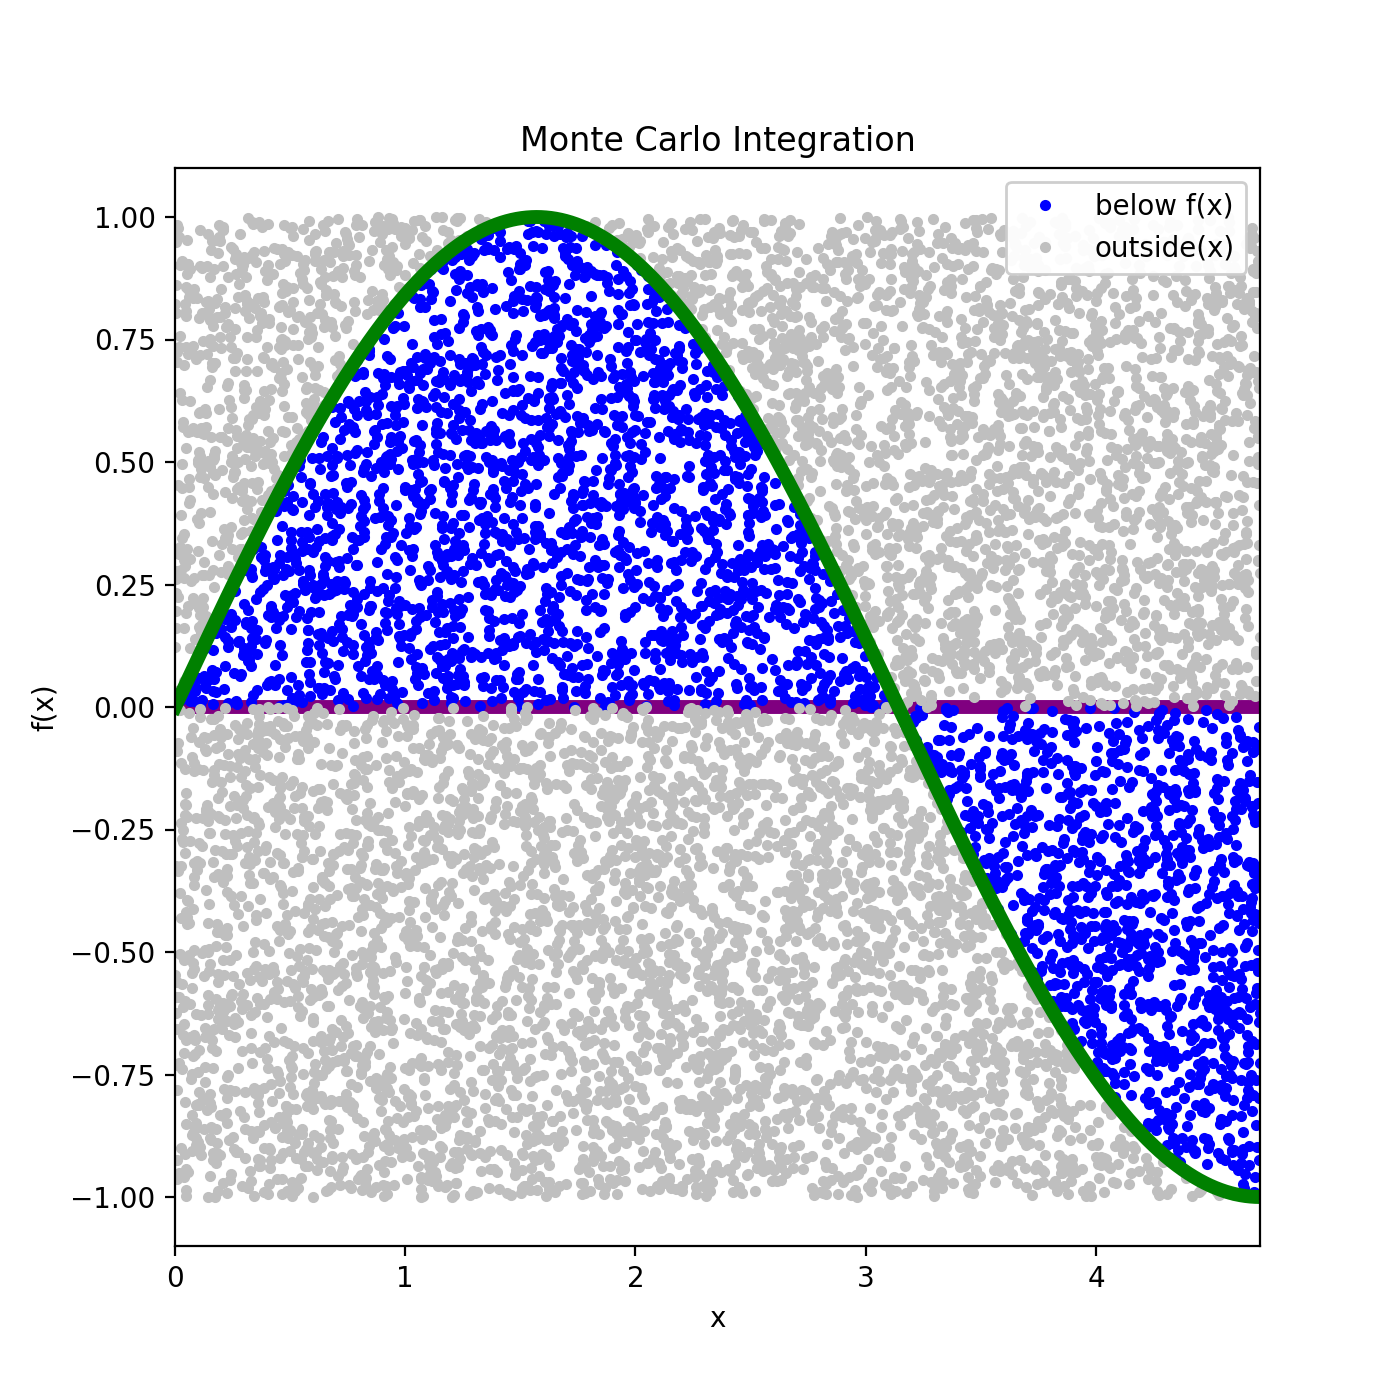

In [22]:
fig = plt.figure(figsize=(7,7))
plt.xlim([sample[0],sample[1]]) #Confines x axis to sample box
plt.ylim([-1.1,1.1]) #Confines y axis to sample box
# Plot points inside integral
plt.plot(x[ir_pos],y[ir_pos],'.',color='blue', label = 'below f(x)')
plt.plot(x[ir_neg],y[ir_neg],'.',color='blue')
# Plot points outside integral
plt.plot(x[ur_pos],y[ur_pos],'.',color='0.75', label = 'outside(x)')
plt.plot(x[ur_neg],y[ur_neg],'.',color='0.75')
# Plot graph f(x)
plt.plot(var,func,color='green',linewidth=5.0)
# Plot x-axis
plt.hlines(0,-5,5,'purple',linewidth=5.0)


#plot floating point F(a,b) = XXX 
#plt.plot(x,y, 'm', marker='*', markersize =15, label = 'F(a,b)=XXXX')


plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Monte Carlo Integration')
plt.legend(loc=1,framealpha=0.95)
plt.show()